In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Chrome Downloads\deaths-illicit-drugs NEW.csv")

In [3]:
df.head()

,COUNTRY,Code,Year,Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),"Deaths that are from all causes attributed to drug use, in both sexes aged all ages"
0,American Samoa,ASM,1990,0,13.090.138
1,Andorra,AND,1990,0,20.659.685
2,Antigua and Barbuda,ATG,1990,0,6.584.844
3,Bahamas,BHS,1990,0,39.783.647
4,Barbados,BRB,1990,0,26.759.732


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 5 columns):
 #   Column                                                                               Non-Null Count  Dtype 
---  ------                                                                               --------------  ----- 
 0   COUNTRY                                                                              6960 non-null   object
 1   Code                                                                                 6960 non-null   object
 2   Year                                                                                 6960 non-null   int64 
 3   Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)                     6960 non-null   int64 
 4   Deaths that are from all causes attributed to drug use, in both sexes aged all ages  6960 non-null   object
dtypes: int64(2), object(3)
memory usage: 272.0+ KB


In [5]:
# Convert 'Deaths that are from all causes attributed to drug use' column to numeric
df['Deaths that are from all causes attributed to drug use, in both sexes aged all ages'] = pd.to_numeric(df['Deaths that are from all causes attributed to drug use, in both sexes aged all ages'], errors='coerce')

In [6]:
df.describe()

,Year,Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),"Deaths that are from all causes attributed to drug use, in both sexes aged all ages"
count,6960.000000,6960.000000,745.000000
mean,2004.500000,2406.845402,71699.619518
std,8.656063,10299.186803,97110.483668
min,1990.000000,0.000000,0.000000
25%,1997.000000,4.000000,454.689000
50%,2004.500000,29.000000,42761.000000
75%,2012.000000,202.000000,104736.190000
max,2019.000000,128083.000000,494491.700000


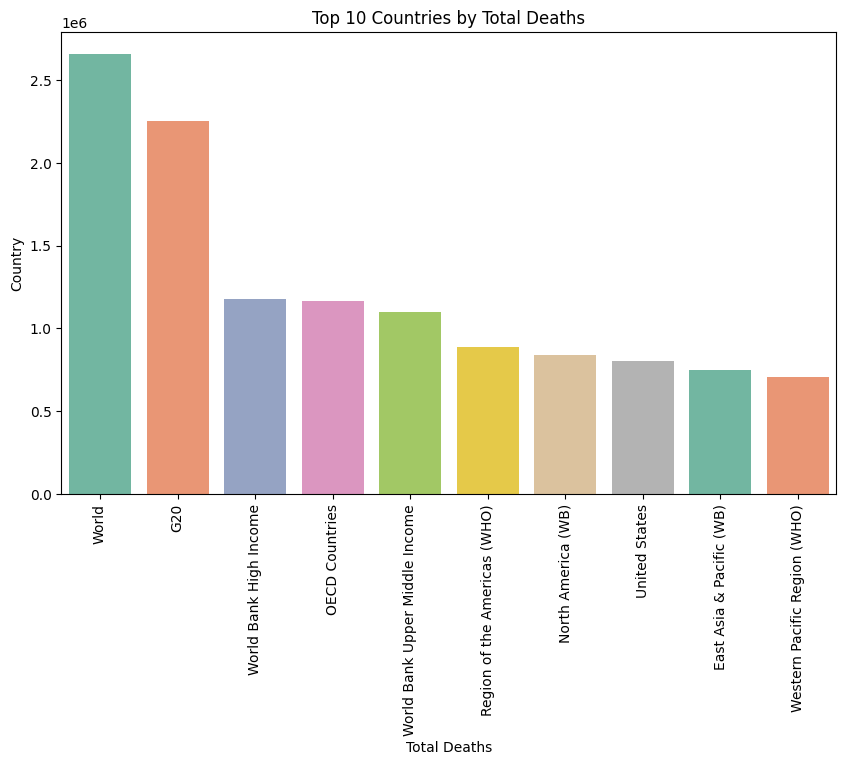

In [16]:
# Group data by country and sum the deaths
deaths_by_country = df.groupby('COUNTRY')['Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=deaths_by_country, palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.title('Top 10 Countries by Total Deaths')
plt.show()

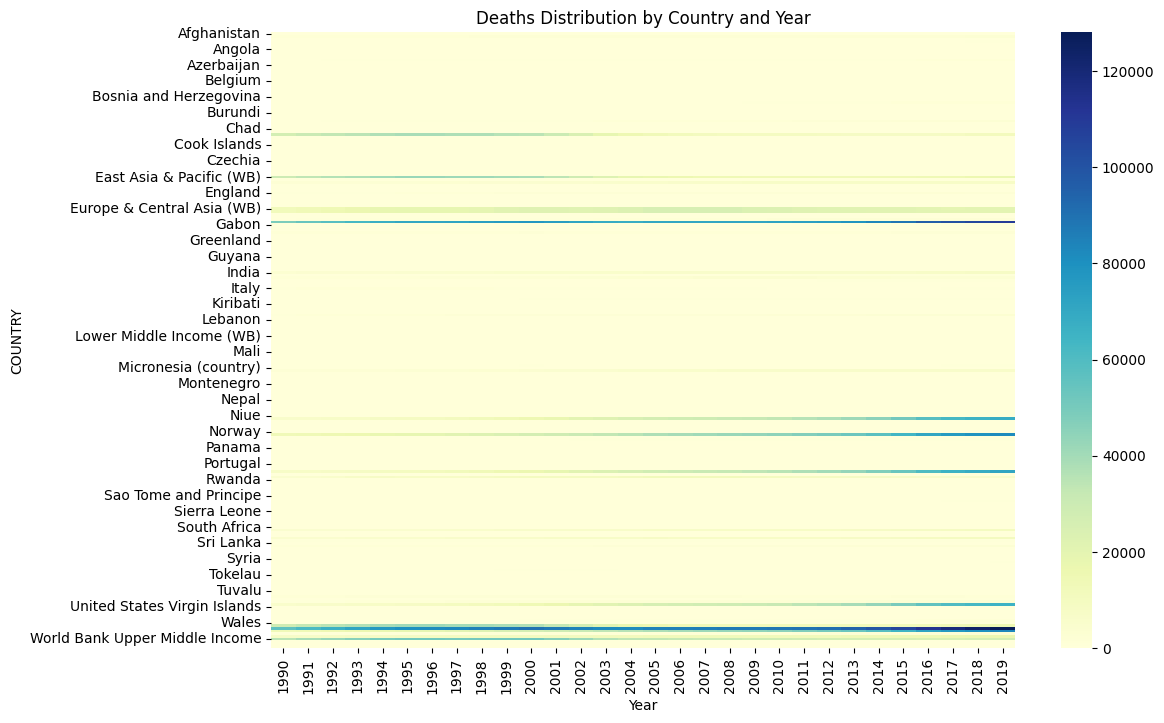

In [17]:
pivot_table = df.pivot_table(index='COUNTRY', columns='Year', values='Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)', aggfunc='sum')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Deaths Distribution by Country and Year')
plt.show()

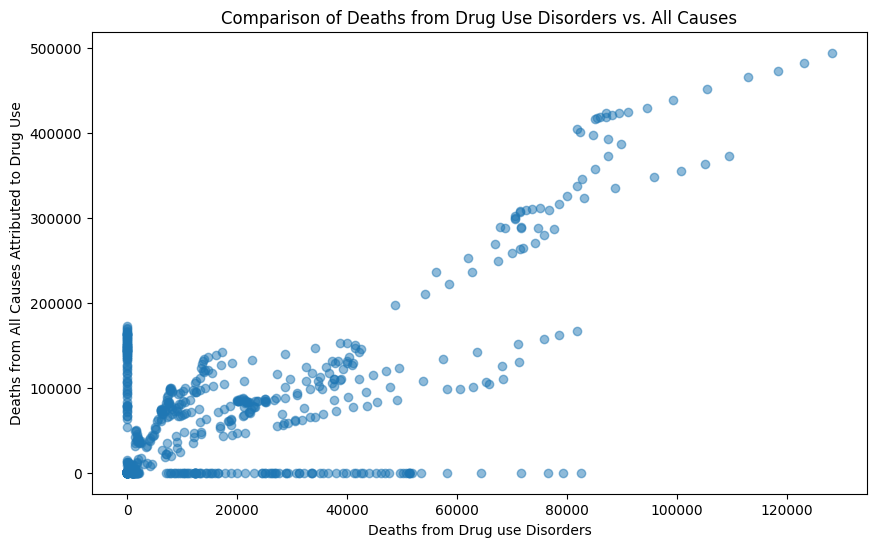

In [19]:
df['Deaths that are from all causes attributed to drug use, in both sexes aged all ages'] = pd.to_numeric(df['Deaths that are from all causes attributed to drug use, in both sexes aged all ages'], errors='coerce')

plt.figure(figsize=(10,6))
plt.scatter(df['Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)'], df['Deaths that are from all causes attributed to drug use, in both sexes aged all ages'], alpha=0.5)
plt.xlabel('Deaths from Drug use Disorders')
plt.ylabel('Deaths from All Causes Attributed to Drug Use')
plt.title('Comparison of Deaths from Drug Use Disorders vs. All Causes')
plt.show()

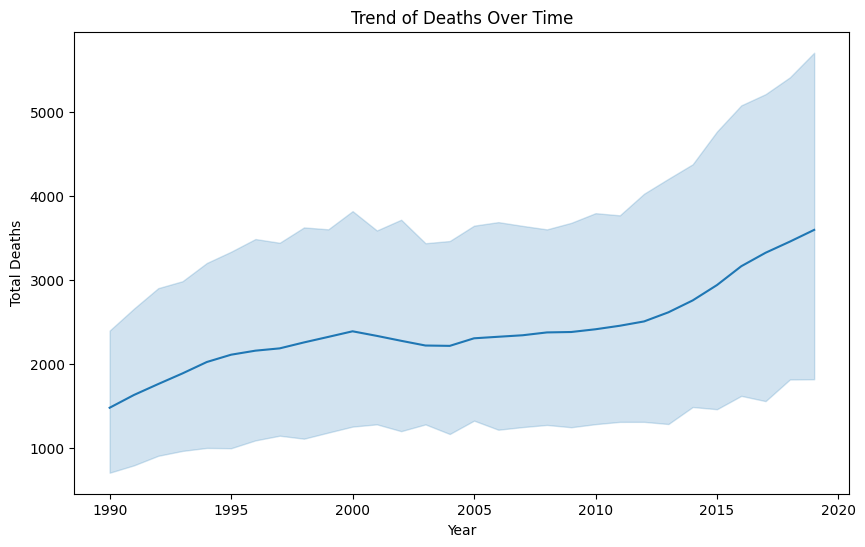

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)', data=df)
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Trend of Deaths Over Time')
plt.show()

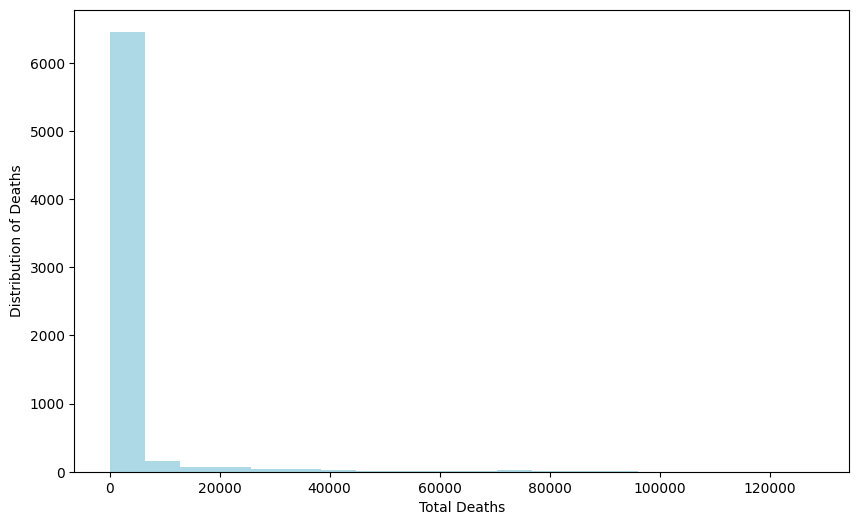

In [22]:
plt.figure(figsize=(10,6))
plt.hist(df['Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)'], bins=20, color='lightblue')
plt.xlabel('Total Deaths')
plt.ylabel('Distribution of Deaths')
plt.show()